# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed, as well as Scikit-Learn ≥0.20. You don't need to change any code in the following cell, just run it.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    # plt.savefig(path, format=fig_extension, dpi=resolution)

# Read the dataset 

In [10]:
# fields are separated by comma and skip the first row (titles) when reading
data = np.loadtxt("hw03_data.txt", skiprows=1, dtype = "float", delimiter=",")

# Scale the data with sklearn StandardScaler
# Write your code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)


X = data[:, [0]]
y = data[:, [1]]

# Visualize the dataset

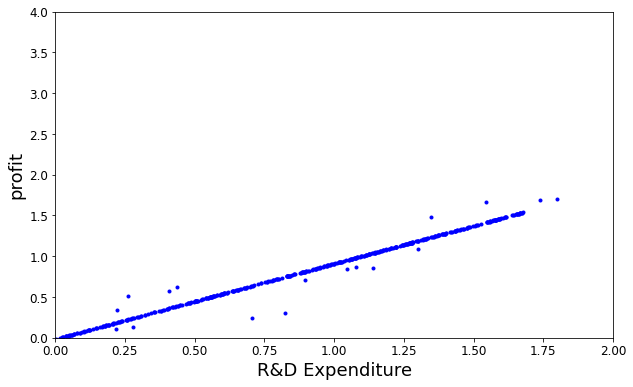

In [17]:
# Write your code here
# visualize the data
fig , ax = plt.subplots(figsize=(10, 6))
plt.plot(X, y, "b.",)
plt.xlabel("R&D Expenditure", fontsize=18)
plt.ylabel("profit", fontsize=18)
plt.axis([0, 2, 0, 4])
# save_fig("generated_data_plot")
plt.show()

# Training with scikit_learn Linear Regression 



In [18]:
# Write your code here
# split the data into training and test sets with 80% training and 20% test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Fitting the training data to the model
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

(0.0, 2.0, 0.0, 4.0)

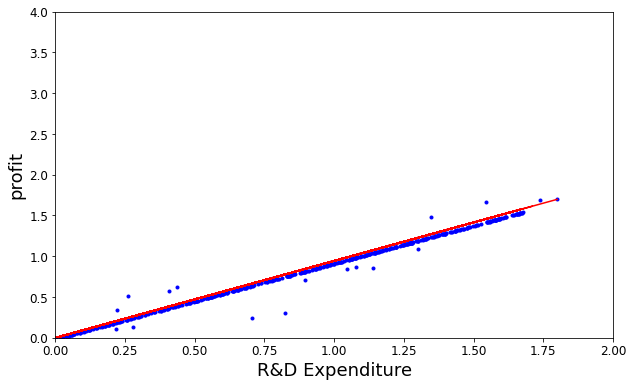

In [20]:
# Write your code here
# visualize the data and the model
fig , ax = plt.subplots(figsize=(10, 6))
plt.plot(X, y, "b.",)
plt.plot(X, linreg.predict(X), "r-")
plt.xlabel("R&D Expenditure", fontsize=18)
plt.ylabel("profit", fontsize=18)
plt.axis([0, 2, 0, 4])
# save_fig("generated_data_plot")

In [23]:
# calculating the intercept and coefficient 
print("Intercept: ", linreg.intercept_)
print("Coefficient: ", linreg.coef_)

Intercept:  [-0.00115483]
Coefficient:  [[0.94421415]]


# Prediction
Now we can make predictions using the weights.

In [21]:
# Write your code here
# predicting using weights
y_pred = linreg.predict(X_test)
y_pred

array([[ 0.12876307],
       [-0.18041772],
       [-0.65296841],
       [ 0.19000648],
       [ 1.00174053],
       [-0.65128355],
       [ 0.83644218],
       [ 0.469002  ],
       [-0.74127097],
       [-0.65846955],
       [ 1.15341795],
       [ 1.0427454 ],
       [-0.33329281],
       [-0.26484309],
       [-0.64695977],
       [ 0.95990338],
       [-0.0612397 ],
       [-0.34908577],
       [ 0.02639299],
       [-0.32543693],
       [-1.03139059],
       [ 0.15257431],
       [-1.27526807],
       [-1.16088072],
       [ 1.20735357],
       [ 1.07006845],
       [ 1.39287016],
       [ 0.37917697],
       [ 0.07285841],
       [ 1.02015212],
       [ 0.61542187],
       [-0.14178788],
       [ 1.09942144],
       [ 0.52805307],
       [-1.27471998],
       [-0.71764243],
       [-0.87979436],
       [-1.06447867],
       [-0.06154419],
       [ 1.20510033],
       [-1.38963512],
       [-0.71618087],
       [ 0.05440621],
       [ 0.53448799],
       [ 1.1663081 ],
       [ 0

# Evaluation
Best possible $R^{2}$ score  is 1.0. <br>

In [22]:
# Calculating the R squared value
# Write your code here
from sklearn.metrics import r2_score
print("The R squared value is: ", r2_score(y_test, y_pred))

The R squared value is:  0.9134554891584079


# Linear regression using gradient descent
Solve the same problem with gradient descent algorithm

In [24]:
# Write your code here
# linear regression with gradient descent
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, alpha=0.2)
sgd_reg.fit(X_train, y_train.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [29]:
# Getting the intercept and coefficient of the model
print("Intercept: ", sgd_reg.intercept_)
print("Coefficient: ", sgd_reg.coef_)

Intercept:  [-0.01472569]
Coefficient:  [0.92663399]


Print out the weight values

In [27]:
# Write your code here
y_pred_SGD = sgd_reg.predict(X_test)
print(y_pred_SGD)

[ 0.11277329 -0.19065091 -0.65440326  0.17287642  0.96949694 -0.65274978
  0.80727625  0.44667737 -0.74106174 -0.65980198  1.1183503   1.00973834
 -0.34067965 -0.27350439 -0.6485065   0.92843875 -0.07369185 -0.35617857
  0.01230922 -0.33297003 -1.02577966  0.1361412  -1.26511644 -1.15285884
  1.1712817   1.03655267  1.35334419  0.35852478  0.05790951  0.98756573
  0.59037107 -0.15274032  1.06535914  0.50462898 -1.26457856 -0.71787313
 -0.87700598 -1.05825169 -0.07399067  1.16907042 -1.37735411 -0.71643878
  0.03980088  0.5109441   1.13100045  0.64109119  0.7568948   0.43348935
  0.50711917 -1.05191666 -0.1271412  -1.3269129   1.19978935  1.32712751
 -0.29634378 -0.40666998  1.40123545  0.38856798  0.04798861 -1.20561095
 -0.02723494 -0.69095919  1.45777264 -1.35344832  1.37862456 -0.47002988
 -1.26340319 -1.58913946 -0.86162659 -0.45534774 -0.41426963  0.34254775
  0.20118486  1.10693529 -0.56370072 -0.33665551 -0.43002753 -0.8735494
 -1.25836305  1.52038588  1.05745031 -1.183777    0.

## Evaluation

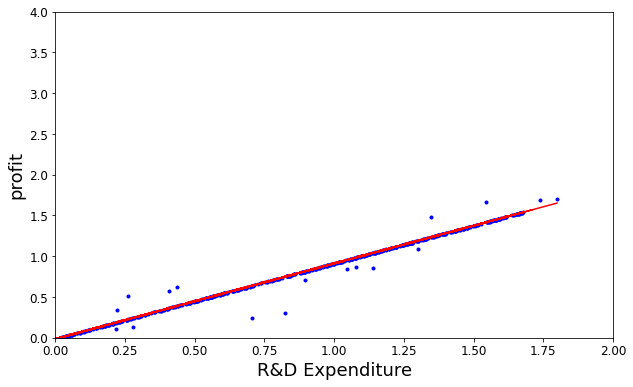

In [32]:
# Write your code here
# visualize the data and the model
fig , ax = plt.subplots(figsize=(10, 6))
plt.plot(X, y, "b.",)
plt.plot(X, sgd_reg.predict(X), "r-")
plt.xlabel("R&D Expenditure", fontsize=18)
plt.ylabel("profit", fontsize=18)
plt.axis([0, 2, 0, 4])
# save_fig("generated_data_plot")
plt.show()

In [28]:
# Calculating the R squared value
print("The R squared value is: ", r2_score(y_test, y_pred_SGD))

The R squared value is:  0.9126105745155131


### Question 7

The R squared value is 0.91 meaning that 91% of the variance in the dependent variable is explained by the independent variable.i.e., 91% variability in R&D is due to variation in the profit while we can't say about the 9% variations . This is a good result.

R squared is an increasing function of the number of independent variables i.e, with the inclusion of one more independent variable R2 is likely to increase or at least will not decrease hence some ways to improve the R squared value is to include more independent variables/features.

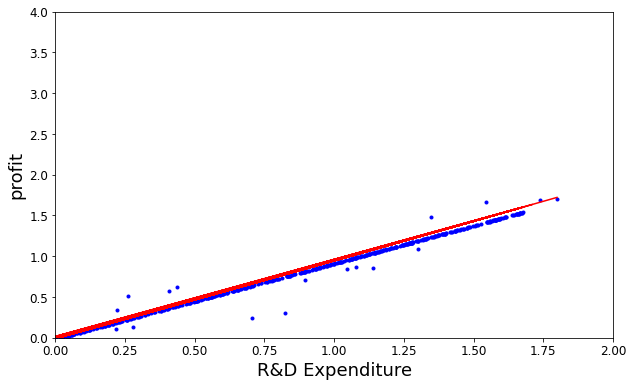

The R squared value is:  0.8935566323040345


In [39]:
# code to try improve the R squared value by adding more features
# Write your code here
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly

# Write your code here
# fitting the data to the model
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Write your code here
# visualizing the data and the model
fig , ax = plt.subplots(figsize=(10, 6))
plt.plot(X, y, "b.",)
plt.plot(X, lin_reg.predict(X_poly), "r-")
plt.xlabel("R&D Expenditure", fontsize=18)
plt.ylabel("profit", fontsize=18)
plt.axis([0, 2, 0, 4])
# save_fig("generated_data_plot")
plt.show()

# Write your code here
# predicting using weights
y_pred_poly = lin_reg.predict(X_poly)

# Write your code here
# Calculating the R squared value
print("The R squared value is: ", r2_score(y, y_pred_poly))


Well adding more features did not improve the R squared value. This is because the data is not linearly separable. Hence we need to use a non-linear model to improve the R squared value.